In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns

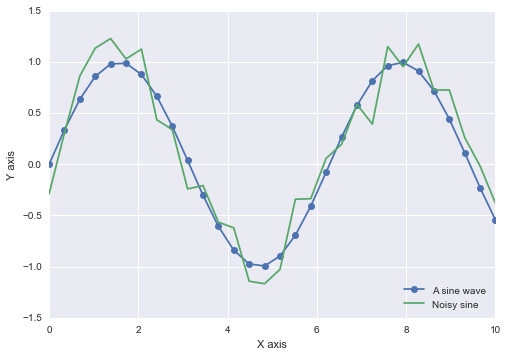

In [3]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
z = y + np.random.normal(size=30) * 0.2

plt.plot(x, y, 'o-', label='A sine wave')
plt.plot(x, z, '-', label='Noisy sine')
plt.legend(loc='lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [4]:
print("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print(x)
print()

print("Add 1 to every element")
x = x + 1
print(x)
print()

print("Get the element at row 1, column 2")
print(x[1, 2])
print()

print("Get the first row")
print(x[0, :])
print()

print("Get every 2nd column of the first row")
print(x[0, ::2])
print()

Make a 3 row x 4 column array of random numbers
[[ 0.9424069   0.0673724   0.47167119  0.20632083]
 [ 0.10702568  0.34952917  0.73440962  0.02866606]
 [ 0.59969829  0.68713081  0.78312435  0.52499641]]

Add 1 to every element
[[ 1.9424069   1.0673724   1.47167119  1.20632083]
 [ 1.10702568  1.34952917  1.73440962  1.02866606]
 [ 1.59969829  1.68713081  1.78312435  1.52499641]]

Get the element at row 1, column 2
1.7344096239

Get the first row
[ 1.9424069   1.0673724   1.47167119  1.20632083]

Get every 2nd column of the first row
[ 1.9424069   1.47167119]



In [ ]:
print("Max is ", x.max())